# Task 1 - Change in Orientation

## Response Visualizations

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF
from matplotlib.ticker import NullLocator as NL
import numpy as np

### Techniques
- Method 0: Animation
- Method 1: MotionRugs
- Method 2: Small Multiples
- Method 3: Streamlines

In [3]:
# techniques
techniques = {
    "motionRugs": {"id": 1, "name": "MotionRugs", "color":"forestgreen"},
    "animation": {"id": 0, "name": "Animation", "color":"teal"},
    "small_multiples": {"id": 2, "name": "Small Multiples", "color":"mediumpurple"},
    "streamlines": {"id": 3, "name": "Streamlines", "color":"steelblue"},
    }

### Task data

In [4]:
# task 1 study data:
data_t1 = {
    "animation": [
         {"user": 7,  "values": [411, 765, 1359, 1734, 2016]} # user 7
        ,{"user": 9,  "values": [393, 786, 1308, 1677, 2064]} # user 9
        ,{"user": 13, "values": [1185, 1527, 1623, 1971, 2301]} # user 13
        ,{"user": 16, "values": [324, 639, 1161, 1566, 1887]} # user 16
        ,{"user": 22, "values": [351, 651, 1215, 1542, 1908, 147]} # user 22
        
        ],
    "motionRugs": [
         {"user": 5,  "values": [1662, 141, 742]} # user 5
        ,{"user": 8,  "values": [145, 722, 1692]} # user 8
        ,{"user": 12, "values": [149, 724, 1736]}# user 12 
        ,{"user": 17, "values": [147, 758, 1750]} # user 17
        ,{"user": 20, "values": [694, 1553, 63]} # user 20
    ],
    "small_multiples":[
         {"user": 6,  "values": [432, 756, 1296, 1620, 1944]} # user 6
        ,{"user": 10,  "values": [216, 540, 864, 1296, 1728, 2052, 2484]} # user 10
        ,{"user": 14,  "values": [108, 756, 1188, 1296, 1620, 1944, 2376, 2484, 2592]} # user 14
        ,{"user": 18,  "values": [216, 756, 1296, 1620, 1944, 2376, 2592]} # user 18
        ,{"user": 21,  "values": [216, 432, 648, 1296, 1620, 1944]} # user 21
    ],
    "streamlines":[
         {"user": 4,   "values": [108, 324, 648, 1080, 1512, 1836]} # user 4
        ,{"user": 11,  "values": [756, 1296]} # user 11
        ,{"user": 15,  "values": [108, 324, 648, 1620]} # user 15
        ,{"user": 19,  "values": [432, 756, 1296, 1620]} # user 19
        ,{"user": 23,  "values": [216, 540, 756, 1296, 1512]} # user 23
    ]
}

### Response Chart

In [5]:
def plot_task(data_, technique, chart_title, output_name):
    """
    Plot data for Task 1.
    """

    fig_grid, axs = plt.subplots(4, 1) # chart per technique
    img = np.flipud(plt.imread(fname="imgs/motionrugevalversion.png")) # add MotionRug as background image to chart for reference
    y = [20,50,80,110,140]
    radius = 5

    fig_grid.set_size_inches(28.125, 9) # 2700 px x 151 px for 600dpi
    fig_grid.set_dpi(600)
    fig_grid.tight_layout(pad=4)
    multiple_locator = ML(50)
    minor_formatter = SF()
    null_locator = NL()
    for idx, technique in enumerate(techniques): # for each technique
        ax = axs[idx]
        data = data_.get(technique)
        color = techniques.get(technique)["color"]    
        sub_label = techniques.get(technique)["name"]              
        
        # chart setup
        ax.imshow(img, alpha=.5, origin="lower") # show MotionRug in background
        ax.set_xlim(0,2700)
        ax.set_ylim(0,151)
        ax.xaxis.set_minor_locator(multiple_locator)
        ax.xaxis.set_minor_formatter(minor_formatter)
        ax.tick_params(axis="x", which="minor", rotation=90, labelsize = 10)
        ax.tick_params(axis="x", which="major", rotation=90, labelsize = 14)
        ax.yaxis.set_major_locator(null_locator)
        ax.set_ylabel(sub_label, fontsize = 18)

        # iterate over each y position to draw user input
        for i in range(len(y)):    
            y_ = y[i]    
            ax.axhline(y=y_-radius, xmin=.001, xmax=1.011, clip_on=False, color="grey").set_dashes((2,2))
            ax.text(2730, y_- 2* radius, f"user-" + str(data[i]["user"]))

            for x in data[i]["values"]: # draw user input as circle      
                circle = plt.Circle((x,y_- radius), 2*radius, fill = False, color=color, linewidth = 3)
                ax.add_artist(circle)   
    plt.suptitle(chart_title, fontsize=20, fontweight= "bold")
    plt.savefig(f"imgs/output/pdf/{output_name}.pdf", dpi=600)
    plt.savefig(f"imgs/output/png/{output_name}.png", dpi=600)
    plt.show()

chart_title = "Task 1 - Change in Orientation"
output_name = "task1_techniques"
plot_task(data_t1, techniques, chart_title, output_name)

## Statistics

### Direction Calculations

In [2]:
import pandas as pd
import math
import numpy as np
from cmath import rect, phase
from math import radians, degrees

# Returns always a positive angle in degrees (0°-360°)
# input: value in degrees
# output: degreed value in ranging from (0°-360°)
def positive_degree(degree:float):
    degree_ = degree % 360
    if degree_ < 0:
        return degree_ + 360
    elif degree_ > 360:
        return degree_ - 360
    return degree_

# Converts mixed series of positive and negative degrees into positive scaled degrees
# input: pd.Series of floating degrees
# output: converted pd.Series in a positve scaling range between (0°-360°)
def positive_degrees(degrees: pd.Series):
    degrees_ = pd.Series
    degrees_ = degrees.apply(positive_degree)
    return degrees_

def mean_angle(deg):
    return degrees(phase(sum(rect(1, radians(d)) for d in deg)/len(deg)))


def get_swim_directions_line_chart(df):
    #reorder to frame-id matrix and fill with according acceleration
    ldf = df.pivot_table(index='t',columns='a',values=['x','y'])
    fish_no = len(ldf.iloc[0]['x'])
    windows = len(ldf) - 1
    print("number of fish", fish_no)
    print("number of windows", windows)
    windows_dict = {}
    
    for i in range(windows):
        win_id = "window_"+ str(i)
        x0 = ldf.iloc[i]['x']
        y0 = ldf.iloc[i]['y']
        x1 = ldf.iloc[i+1]['x']
        y1 = ldf.iloc[i+1]['y']
        # delta between x and y positions between current and next frame
        dx = x1 - x0
        dy = y1 - y0

        # calculate angles per fish
        angles = np.degrees(np.arctan2(dy, dx))

        # convert angles in positive degrees
        positive_degrees_ = positive_degrees(angles)
        
        # determine mean angle and append to the window dictionary
        windows_dict[win_id] = mean_angle(positive_degrees_)
    
    return windows_dict

df = pd.read_csv('./fishdataEVAL.csv')
windows_dict = get_swim_directions_line_chart(df=df)

number of fishies 151
number of windows 2700


In [3]:
#set angles they need to cross for a direction change
moves = {
    "turnUp":-135,
    "turnDown":45,
    "turnLeft":135,
    "turnRight":-45
}
#collect dataframe with the number of neighbouring crossing to determine the window with strongst change of direction
most_stable = {
    "turnRight":{},
    "turnDown":{},
    "turnLeft":{},
    "turnUp":{}
}
i=0
for k,v in windows_dict.items():
    if(not (i >= (len(windows_dict)-1)) ):
        for move, angle in moves.items():
            if(v<angle and list(windows_dict.values())[i+1]>angle):
                most_stable[move][k] = 1
                crossing_num = 1
                j=0
                #print("The fish make a " + move + " at " +  k + ".")
                while(j<100): #looked at 100 neighbouring spans from the detected change of direction
                    j+=1
                    try:
                        if(list(windows_dict.values())[i-j]<angle and list(windows_dict.values())[i+j+1]>angle):
                            crossing_num += 1
                    except:
                        continue
                most_stable[move][k] = crossing_num
                #print(str(v) + ' ' +  str(list(windows_dict.values())[i+1]))
    i=i+1
#print(most_stable)

most_stable_result = {}

for key in most_stable:
    print(key)
    max_key = max(most_stable[key], key=most_stable[key].get)
    if key == "turnDown":
        maxDown = max(most_stable[key], key=most_stable[key].get)
        temp = most_stable[key]
        temp.pop(max_key)
        print(temp)
        most_stable_result['turnDown2'] = max(temp, key=temp.get)
    most_stable_result[key] = max_key
    
direction_changes_windows = {}
for key in most_stable_result:
    v = most_stable_result[key]
    direction_changes_windows[key] = int(v.split("_")[1])
    times = int(v.split("_")[1])/25
    print("They make a " + str(key) + " at " + str(times) + " seconds.") 
print(direction_changes_windows)

turnRight
turnDown
{'window_471': 97, 'window_475': 97, 'window_485': 91, 'window_911': 2, 'window_919': 5, 'window_927': 5, 'window_932': 1, 'window_940': 5, 'window_943': 8, 'window_958': 21, 'window_963': 24, 'window_966': 30, 'window_970': 34, 'window_974': 37, 'window_981': 39, 'window_1149': 3, 'window_1151': 4, 'window_1154': 7, 'window_1158': 9, 'window_1161': 9, 'window_1166': 6, 'window_1172': 4, 'window_1177': 4, 'window_1185': 5, 'window_1189': 3, 'window_1193': 2}
turnLeft
turnUp
They make a turnRight at 67.6 seconds.
They make a turnDown2 at 18.84 seconds.
They make a turnDown at 82.92 seconds.
They make a turnLeft at 30.08 seconds.
They make a turnUp at 52.52 seconds.
{'turnRight': 1690, 'turnDown2': 471, 'turnDown': 2073, 'turnLeft': 752, 'turnUp': 1313}


### Completion and Response Statistics

Technique: animation
Total Duration: 538
Duration Mean: 107.6
Duration Median: 99.0
Duration Minimum: 84
Duration Maximum: 136
Duration Variance: 532.3000000000001

Technique: motionrugs
Total Duration: 272
Duration Mean: 54.4
Duration Median: 50.0
Duration Minimum: 45
Duration Maximum: 75
Duration Variance: 146.8

Technique: small_multiples
Total Duration: 408
Duration Mean: 81.6
Duration Median: 65.0
Duration Minimum: 54
Duration Maximum: 143
Duration Variance: 1400.7999999999997

Technique: streamlines
Total Duration: 445
Duration Mean: 89.0
Duration Median: 114.0
Duration Minimum: 33
Duration Maximum: 122
Duration Variance: 1725.0

-------------
Total #answers 26
Mean #answers 5.2
Median #answers 5
Maximum #answers 6
Minimum #answers 5
Variance #answers 0.2

Total #answers 15
Mean #answers 3.0
Median #answers 3
Maximum #answers 3
Minimum #answers 3
Variance #answers 0

Total #answers 34
Mean #answers 6.8
Median #answers 7
Maximum #answers 9
Minimum #answers 5
Variance #answers 2.2


C:\Users\Raphael\AppData\Local\Temp\ipykernel_30852\2419778039.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])


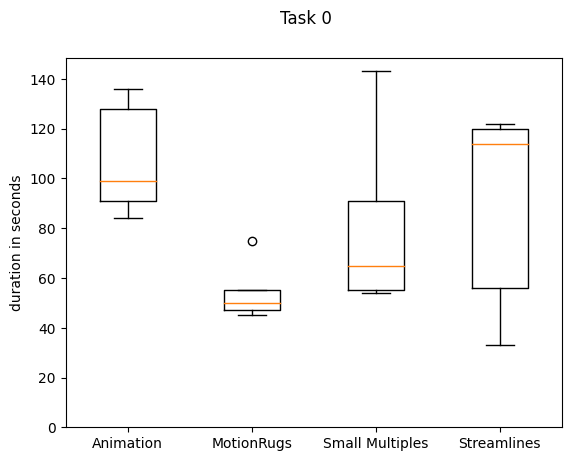

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import ast
import statistics

# Create your connection.
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT id, Cast ((JulianDay(end_time) - JulianDay(start_time)) * 24 * 60 * 60 As Integer) as duration_seconds FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 0)"

duration_data = []
for i in range(4):
    qu = qu_start + str(i) + qu_end
    duration_frame = pd.read_sql_query(qu, cnx)
    duration_data.append(duration_frame["duration_seconds"])
cnx.commit()
cnx.close()


techniques = ["animation", "motionrugs", "small_multiples", "streamlines"]
    
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_ylabel('duration in seconds')
ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])
fig.suptitle('Task 0')
ax.boxplot(duration_data)
plt.ylim(ymin=0)
#plt.show()

# Process each series in the dataset
for i, series in enumerate(duration_data):
    print(f"Technique: {techniques[i]}")
    print("Total Duration:", series.sum())
    print("Duration Mean:", series.mean())
    print("Duration Median:", series.median())
    print("Duration Minimum:", series.min())
    print("Duration Maximum:", series.max())
    print("Duration Variance:", series.var())
    print()




# user duration
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT * FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 0)"


tracking_data = {}
for i in range(4):
    qu = qu_start + str(i) + qu_end
    tracking_frame = pd.read_sql_query(qu, cnx)
    tracking_data[techniques[i]] = tracking_frame
cnx.commit()
cnx.close()

print("-------------")

#user actions

for t in techniques:
    ev = {}
    task_d = tracking_data[t]["task_data"]
    
    # Convert the string representations of nested lists to actual lists
    a = task_d.apply(ast.literal_eval)

    # Collect the count of items in each sublist
    item_counts = [len(sublist) for sublist in a]

    # Calculate the mean
    mean_items = sum(item_counts) / len(item_counts)

    # Calculate the median
    median_items = statistics.median(item_counts)

    # Calculate the maximum and minimum
    max_items = max(item_counts)
    min_items = min(item_counts)

    # Calculate the variance
    variance_items = statistics.variance(item_counts)

    # Calculate the total number of items
    total_items = sum(item_counts)

    print("Total #answers", total_items)
    print("Mean #answers", mean_items)
    print("Median #answers", median_items)
    print("Maximum #answers", max_items)
    print("Minimum #answers", min_items)
    print("Variance #answers", variance_items)
    print("")
 

### Error Statistics

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def error_statistics_task0():
    # task 0 data:
    data_t0 = {
        "animation": [
             {"user": 7,  "values": [411, 765, 1359, 1734, 2016]} # user 7
            ,{"user": 9,  "values": [393, 786, 1308, 1677, 2064]} # user 9
            ,{"user": 13, "values": [1185, 1527, 1623, 1971, 2301]} # user 13
            ,{"user": 16, "values": [324, 639, 1161, 1566, 1887]} # user 16
            ,{"user": 22, "values": [351, 651, 1215, 1542, 1908, 147]} # user 22

            ],
        "motionRugs": [
             {"user": 5,  "values": [1662, 141, 742]} # user 5
            ,{"user": 8,  "values": [145, 722, 1692]} # user 8
            ,{"user": 12, "values": [149, 724, 1736]}# user 12 
            ,{"user": 17, "values": [147, 758, 1750]} # user 17
            ,{"user": 20, "values": [694, 1553, 63]} # user 20
        ],
        "small_multiples":[
             {"user": 6,  "values": [432, 756, 1296, 1620, 1944]} # user 6
            ,{"user": 10,  "values": [216, 540, 864, 1296, 1728, 2052, 2484]} # user 10
            ,{"user": 14,  "values": [108, 756, 1188, 1296, 1620, 1944, 2376, 2484, 2592]} # user 14
            ,{"user": 18,  "values": [216, 756, 1296, 1620, 1944, 2376, 2592]} # user 18
            ,{"user": 21,  "values": [216, 432, 648, 1296, 1620, 1944]} # user 21
        ],
        "streamlines":[
             {"user": 4,   "values": [108, 324, 648, 1080, 1512, 1836]} # user 4
            ,{"user": 11,  "values": [756, 1296]} # user 11
            ,{"user": 15,  "values": [108, 324, 648, 1620]} # user 15
            ,{"user": 19,  "values": [432, 756, 1296, 1620]} # user 19
            ,{"user": 23,  "values": [216, 540, 756, 1296, 1512]} # user 23
        ]
    }

    correct_values = {
        'turnRight': 1690,
        'turnDown2': 471,
        'turnDown': 2073,
        'turnUp': 1313
    }
    # Iterate over each technique in the data dictionary
    for technique in data_t0:
        # Extract all the values associated with the current technique and flatten the list
        values = [val for item in data_t0[technique] for val in item['values']]
        
        # Find the nearest frame in correct_values for each value
        nearest_frames = [min(correct_values.values(), key=lambda x: abs(x - val)) for val in values]

        # Calculate the absolute difference between the values and the nearest frames
        differences = np.abs(np.array(values) - np.array(nearest_frames))

        # Calculate the average difference
        average_difference = np.mean(differences)

        # Calculate the mean, median, minimum, maximum, and variance of the values
        mean_values = np.mean(differences)
        median_values = np.median(differences)
        min_values = np.min(differences)
        max_values = np.max(differences)
        var_values = np.var(differences)

        # Print the technique and the calculated attributes
        print("Technique:", technique)
        print("Absolute Frame Error:", sum(differences))
        print("Mean Frame Error:", mean_values)
        print("Median Frame Error:", median_values)
        print("Minimum Frame Error:", min_values)
        print("Maximum Frame Error:", max_values)
        print("Variance Frame Error:", var_values)
        print()
        
error_statistics_task0()

Technique: animation
Absolute Frame Error: 3421
Mean Frame Error: 131.57692307692307
Median Frame Error: 126.0
Minimum Frame Error: 5
Maximum Frame Error: 324
Variance Frame Error: 7540.167159763314

Technique: motionRugs
Absolute Frame Error: 3268
Mean Frame Error: 217.86666666666667
Median Frame Error: 253.0
Minimum Frame Error: 2
Maximum Frame Error: 408
Variance Frame Error: 15742.248888888886

Technique: small_multiples
Absolute Frame Error: 6231
Mean Frame Error: 183.26470588235293
Median Frame Error: 129.0
Minimum Frame Error: 17
Maximum Frame Error: 519
Variance Frame Error: 23161.135813148787

Technique: streamlines
Absolute Frame Error: 3518
Mean Frame Error: 167.52380952380952
Median Frame Error: 177.0
Minimum Frame Error: 17
Maximum Frame Error: 363
Variance Frame Error: 11651.773242630386

